Generated HIGH attendance CSV: classroom_data.csv
Average usage rate: 0.9038802083333333

Loaded Data Sample:
            timestamp room_id  capacity  booking  attend       temp  \
0 2025-01-01 00:00:00    B202        80       85      78  22.294288   
1 2025-01-01 01:00:00    C301        80       82      80  22.590891   
2 2025-01-01 02:00:00    B201        80       78      74  24.032073   
3 2025-01-01 03:00:00    C301        80       85      79  24.566591   
4 2025-01-01 04:00:00    C301        60       54      49  25.684296   

    humidity seat_pref  usage_rate  hour  
0  53.025189    middle    0.975000     0  
1  57.876694     front    1.000000     1  
2  58.635400    window    0.925000     2  
3  57.216366    middle    0.987500     3  
4  61.355358     front    0.816667     4  


C:\Users\14990\AppData\Local\Temp\ipykernel_30904\657366898.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range("2025-01-01", periods=n, freq="H")


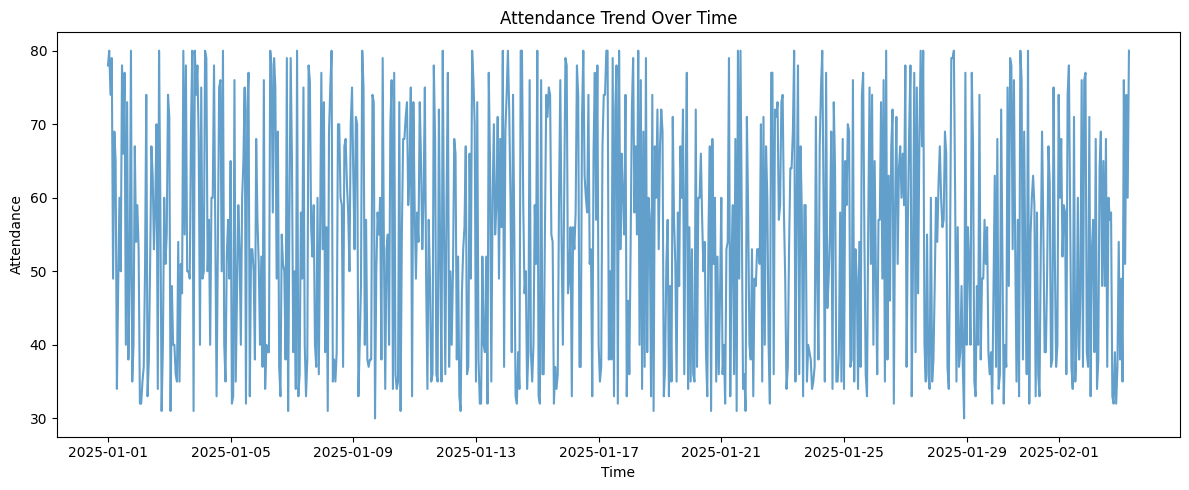

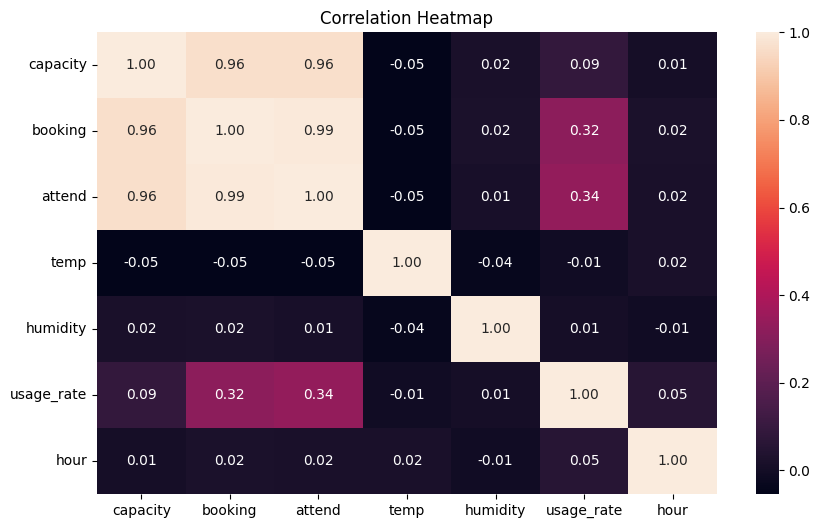

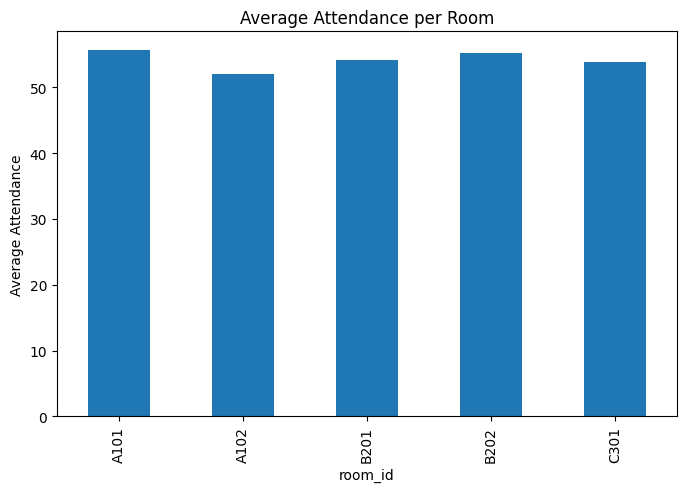

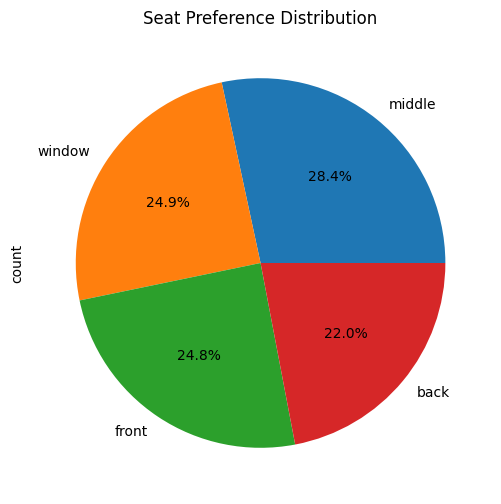

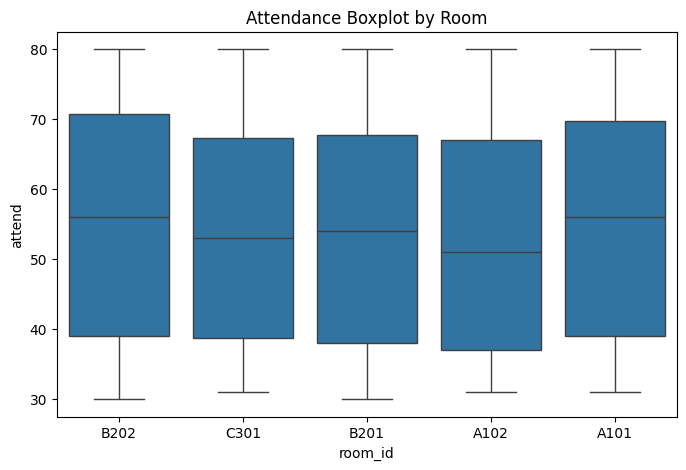

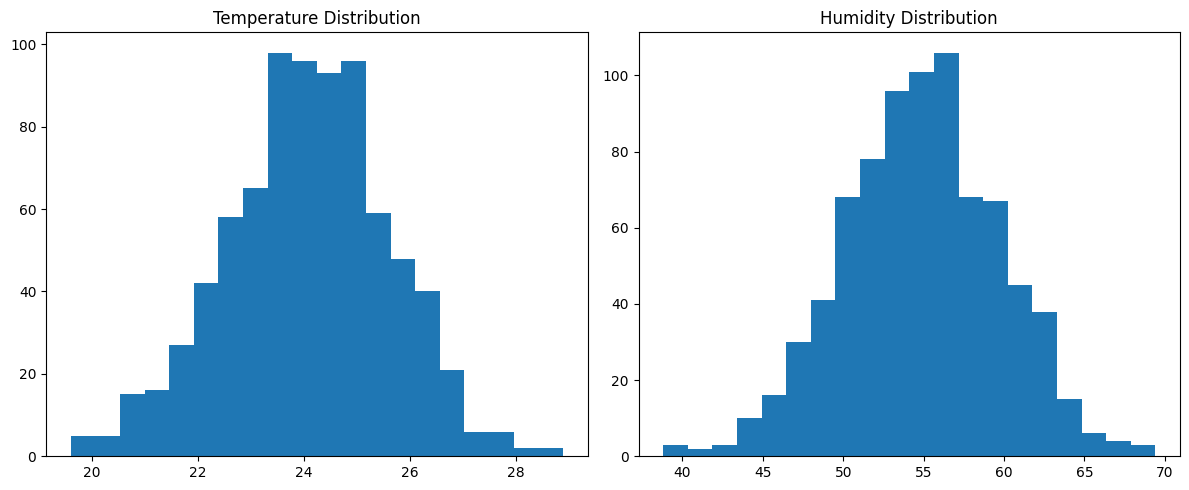

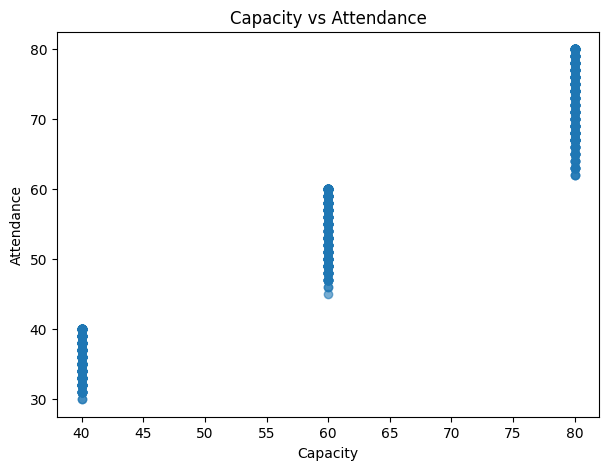

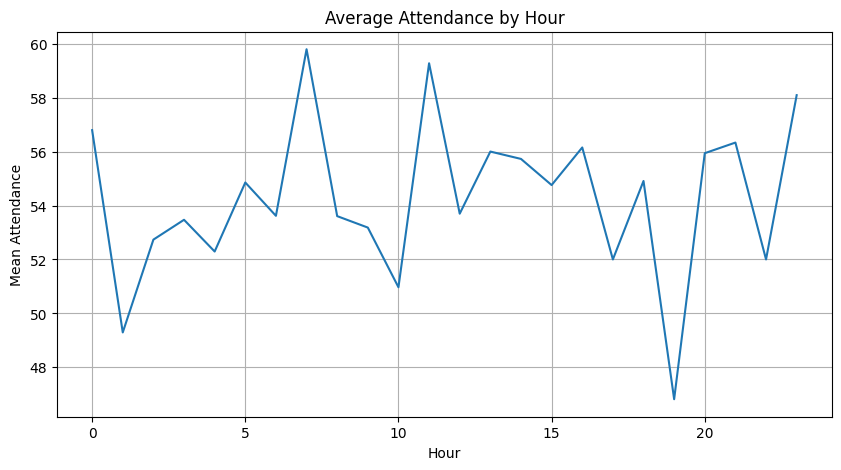


== Regression Summary ==
R²: 0.9971140923934445
MAE: 0.7206024834221951

Coefficients:
  booking: 0.2957
  capacity: 0.6208
  temp: 0.0250
  humidity: -0.0096
  usage_rate: 42.0712
Intercept: -38.190434200384054


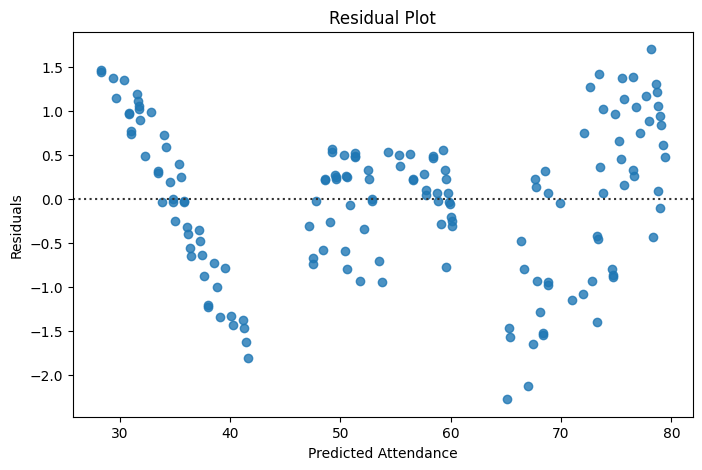


== Chi-Square Test (Room vs Seat Preference) ==
seat_pref  back  front  middle  window
room_id                               
A101         45     42      42      41
A102         28     31      44      51
B201         36     37      35      38
B202         32     41      58      35
C301         35     47      48      34

Chi-square: 16.773, p-value: 0.15833

== CSV Data Sample ==
              timestamp room_id  capacity  booking  attend       temp  \
0   2025-01-01 00:00:00    B202        80       85      78  22.294288   
1   2025-01-01 01:00:00    C301        80       82      80  22.590891   
2   2025-01-01 02:00:00    B201        80       78      74  24.032073   
3   2025-01-01 03:00:00    C301        80       85      79  24.566591   
4   2025-01-01 04:00:00    C301        60       54      49  25.684296   
..                  ...     ...       ...      ...     ...        ...   
795 2025-02-03 03:00:00    A102        80       80      76  25.280713   
796 2025-02-03 04:00:00    C301  

In [8]:
# ===============================
# Classroom ML System — Enhanced Visualization Edition
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.stats import chi2_contingency

# --------------------------------
# 1. Generate HIGH attendance CSV
# --------------------------------
def generate_sample_csv(filename="classroom_data.csv", n=800):  
    np.random.seed(42)
    
    timestamps = pd.date_range("2025-01-01", periods=n, freq="H")
    room_ids = np.random.choice(["A101", "A102", "B201", "B202", "C301"], size=n)
    capacity = np.random.choice([40, 60, 80], size=n)

    booking = (capacity * np.random.uniform(0.85, 1.10, size=n)).astype(int)
    attend = (booking * np.random.uniform(0.90, 1.00, size=n)).astype(int)
    attend = np.minimum(attend, capacity)

    temp = np.random.normal(24, 1.5, size=n)
    humidity = np.random.normal(55, 5, size=n)

    seat_pref = np.random.choice(["front", "middle", "back", "window"], size=n)

    usage_rate = attend / capacity

    df = pd.DataFrame({
        "timestamp": timestamps,
        "room_id": room_ids,
        "capacity": capacity,
        "booking": booking,
        "attend": attend,
        "temp": temp,
        "humidity": humidity,
        "seat_pref": seat_pref,
        "usage_rate": usage_rate
    })

    df.to_csv(filename, index=False)
    print(f"Generated HIGH attendance CSV: {filename}")
    print("Average usage rate:", df['usage_rate'].mean())
    return df


# Generate data
df = generate_sample_csv()

df["timestamp"] = pd.to_datetime(df["timestamp"])
df["hour"] = df["timestamp"].dt.hour

print("\nLoaded Data Sample:")
print(df.head())


# ----------------------------------------
# 2. Attendance Trend Line Plot
# ----------------------------------------
plt.figure(figsize=(12,5))
plt.plot(df["timestamp"], df["attend"], label="Attendance", alpha=0.7)
plt.title("Attendance Trend Over Time")
plt.xlabel("Time")
plt.ylabel("Attendance")
plt.tight_layout()
plt.show()


# ----------------------------------------
# 3. Correlation Heatmap
# ----------------------------------------
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# ----------------------------------------
# 4. Column Bar Chart — Average Attendance per Room
# ----------------------------------------
plt.figure(figsize=(8,5))
df.groupby("room_id")["attend"].mean().plot(kind="bar")
plt.title("Average Attendance per Room")
plt.ylabel("Average Attendance")
plt.show()


# ----------------------------------------
# 5. Pie Chart — Seat Preference Distribution
# ----------------------------------------
plt.figure(figsize=(6,6))
df["seat_pref"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Seat Preference Distribution")
plt.show()


# ----------------------------------------
# 6. Boxplot — Attendance Distribution by Room
# ----------------------------------------
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="room_id", y="attend")
plt.title("Attendance Boxplot by Room")
plt.show()


# ----------------------------------------
# 7. Histogram — Temperature & Humidity Distribution
# ----------------------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(df["temp"], bins=20)
plt.title("Temperature Distribution")

plt.subplot(1,2,2)
plt.hist(df["humidity"], bins=20)
plt.title("Humidity Distribution")
plt.tight_layout()
plt.show()


# ----------------------------------------
# 8. Scatter Plot — Capacity vs Attendance
# ----------------------------------------
plt.figure(figsize=(7,5))
plt.scatter(df["capacity"], df["attend"], alpha=0.6)
plt.title("Capacity vs Attendance")
plt.xlabel("Capacity")
plt.ylabel("Attendance")
plt.show()


# ----------------------------------------
# 9. Hourly Attendance Pattern
# ----------------------------------------
plt.figure(figsize=(10,5))
df.groupby("hour")["attend"].mean().plot()
plt.title("Average Attendance by Hour")
plt.xlabel("Hour")
plt.ylabel("Mean Attendance")
plt.grid(True)
plt.show()


# ----------------------------------------
# 10. Linear Regression Model
# ----------------------------------------
features = ["booking", "capacity", "temp", "humidity", "usage_rate"]
X = df[features]
y = df["attend"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
residuals = y_test - y_pred

print("\n== Regression Summary ==")
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("\nCoefficients:")
for name, coef in zip(features, model.coef_):
    print(f"  {name}: {coef:.4f}")
print("Intercept:", model.intercept_)

# ----------------------------------------
# 11. Residual Plot
# ----------------------------------------
plt.figure(figsize=(8,5))
sns.residplot(x=y_pred, y=residuals)
plt.title("Residual Plot")
plt.xlabel("Predicted Attendance")
plt.ylabel("Residuals")
plt.show()


# ----------------------------------------
# 12. Chi-Square Test (Room vs Seat Preference)
# ----------------------------------------
contingency = pd.crosstab(df["room_id"], df["seat_pref"])
chi2, p_val, dof, expected = chi2_contingency(contingency)

print("\n== Chi-Square Test (Room vs Seat Preference) ==")
print(contingency)
print(f"\nChi-square: {chi2:.3f}, p-value: {p_val:.5f}")


# ----------------------------------------
# 13. Print CSV Sample
# ----------------------------------------
print("\n== CSV Data Sample ==")
print(df)
